In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import seaborn as sns

%matplotlib inline

# loading and viewing data


In [4]:
import tarfile
fname = "fer2013.tar.gz"
if (fname.endswith("tar.gz")):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif (fname.endswith("tar")):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [8]:
dataset = "fer2013/fer2013.csv"
data = pd.read_csv(dataset)
# data['pixels'] = np.array(data['pixels'].rstrip().split(' ')).astype(int)
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
# emotion labels from FER2013:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']
print(data.Usage.value_counts())
print("\n")
print("LABELS:"+"\n")
print(emotion)
print(data.emotion.value_counts())


Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


LABELS:

{'Surprise': 5, 'Sad': 4, 'Happy': 3, 'Fear': 2, 'Disgust': 1, 'Angry': 0, 'Neutral': 6}
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [10]:
def show_data(start, end, data):
    fig = plt.figure(figsize=(8,10))
    for i in range(start, end+1):
        _img = data['pixels'][i]
        _img = np.array(_img.rstrip().split(' ')).astype(int)
        _img = np.reshape(_img, (48,48))
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(_img, cmap="gray")
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

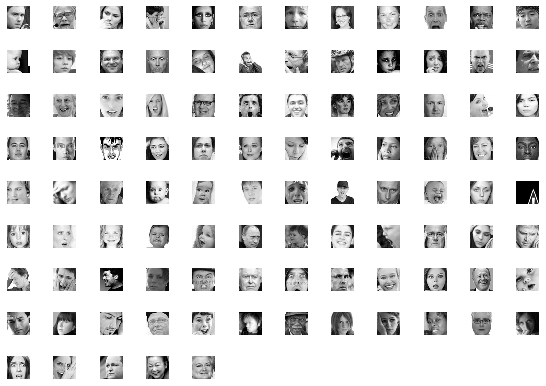

In [74]:
show_data(0,100, data)

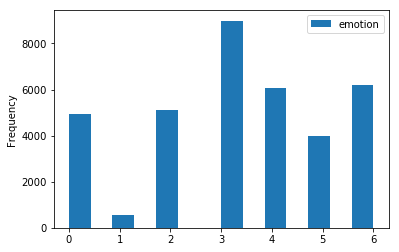

In [12]:
# sns.set_context('poster')
data.plot(x='Usage', y='emotion', kind='hist', bins=14)

In [36]:
features = np.array(data['pixels'])
labels = np.array(data['emotion'])
for i in range(len(features)):
    features[i] =  np.array(feature.rstrip().split(' ')).astype(float)
print(features[0],"\n", labels[0])

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

In [37]:
print(features.shape, labels.shape,type(features[0]), type(labels[0]), labels[0:6])

(35887,) (35887,) <class 'str'> <class 'numpy.int64'> [0 0 2 4 6 2]


In [34]:
features[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [13]:
# [float(feature) for feature in features[0].split()] 
split_idx=0.9
n_records = len(features)
split = int(split_idx*n_records)

trainX, trainY = features[:split],features[split:]
testX, testY = labels[:split], labels[split:]

In [25]:
len(trainX[0])

8287

# Model

In [ ]:
def conv_model():
    inputs= tf.placeholder(tf.float32,[None,48*48])

In [76]:
# hyper parameters

# learning_rate = 0.001
# keep_prob = 0.5

In [14]:
def one_hot_encode(x):
    
#     encoded_x = one_hot_encoder.transform(x)
    return np.eye(7)[x]

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    
    input_image = tf.placeholder(tf.float32,
                                 shape = [None, np.prod(image_shape)],
                                 name = 'x')
    reshaped_input_image = tf.reshape(input_image,[-1,image_shape[0],image_shape[1],1], name = 'reshaped_x')
    
    return reshaped_input_image
                
def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    
    input_labels = tf.placeholder(tf.int32, shape= [None, n_classes], name = 'y')
    return input_labels


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    
    dropout_prob = tf.placeholder(tf.float32, name = 'keep_prob')
    return dropout_prob

### Convoultional layers

In [15]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    
    n_filters = conv_num_outputs
    
    color_channels = int(x_tensor.shape[3])
    
    #initialising weights and biases
    weight = tf.Variable(tf.truncated_normal(shape=[*conv_ksize, color_channels, n_filters], stddev=0.1))
    bias = tf.Variable(tf.zeros(n_filters))

    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, *conv_strides, 1], padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    conv_layer = tf.nn.max_pool(conv_layer, 
                               ksize=[1, *pool_ksize, 1],
                               strides=[1, *pool_strides, 1],
                                padding = 'SAME')
    
    return conv_layer 

# flatten layer

In [16]:
def flatten(x_tensor):
    
    input_shape = x_tensor.shape.as_list()
#     print(input_shape)
    flattened_image_shape = np.prod(input_shape[1:])
    flat_x = tf.reshape(x_tensor, shape=[-1, flattened_image_shape])
    return flat_x

# fully connected

In [17]:
def fully_conn(x_tensor, num_outputs):
    
    n_inputs = x_tensor.shape.as_list()[1]
    
    weights = tf.Variable(tf.truncated_normal([n_inputs, num_outputs], stddev=0.1))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    layer = tf.nn.bias_add(tf.matmul(x_tensor, weights),biases)
    layer = tf.nn.relu(layer)
    return layer

# output layer

In [18]:
def output(x_tensor, num_outputs):
    
    n_inputs = x_tensor.shape.as_list()[1]
    
    weights = tf.Variable(tf.truncated_normal([n_inputs, num_outputs], stddev = 0.1))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    layer = tf.nn.bias_add(tf.matmul(x_tensor, weights),biases)

    return layer

# DEfining model

In [19]:

def conv_net(x, keep_prob):
   
    
    # x is 32x32x3 48x48x1
    x = conv2d_maxpool(x, 32, (3,3), (1,1), (2,2), (2,2))
    x = tf.nn.dropout(x, keep_prob)
    
    #x is 16x16x64 24x24x32
    x = conv2d_maxpool(x, 64, (3,3), (1,1), (2,2), (2,2))
    x = tf.nn.dropout(x, keep_prob)
    
    #x is 8x8x128  12x12x64
    x = conv2d_maxpool(x, 128, (3,3), (1,1), (2,2), (2,2))
    x = tf.nn.dropout(x, keep_prob)
    
    #x is 4x4x256   6x6x128
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x = flatten(x)
    
    # x is [None, 4096]  [None,4608]
    
#     x = fully_conn(x, 2043)
#     x = tf.nn.dropout(x, keep_prob)
    
    x = fully_conn(x, 1056)
    x = tf.nn.dropout(x, keep_prob)
    
    x = fully_conn(x, 512)
    x = tf.nn.dropout(x, keep_prob)
    
    out = output(x, 7)

   
    return out

In [20]:
# the network

tf.reset_default_graph()

# Inputs
x = neural_net_image_input((48, 48))
y = neural_net_label_input(7)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# logits Tensor, so that it can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y), name='cost')
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

# training network and printing stats

In [21]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
   
   
    session.run(optimizer, feed_dict ={
        x: feature_batch,
        y: label_batch,
        keep_prob: keep_probability
    })
    
def print_stats(session, feature_batch, label_batch, cost, accuracy):
   
   
    global valid_features, valid_labels
    
    loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0
    })
    
    validation_accuracy = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0
    })
    
    
    print('Loss: {:.4f} Validation accuracy: {:.4f}'.format(loss, validation_accuracy))

In [22]:
# hyperparameters
epochs = 5
batch_size = 128
keep_probability = 0.5
split_idx = 0.9

In [86]:
features = pd.DataFrame.copy(data['pixels'])
labels = data['emotion']
assert len(features) == len(labels)

for label in labels:
    label = one_hot_encode(label)
# plt.imshow(_img, cmap='gray')
# X_train = _img = data['pixels'][i]
#         _img = np.array(_img.rstrip().split(' ')).astype(int)
#         _img = np.reshape(_img, (48,48))

In [87]:
# np.array(features[0].rstrip().split(' ')).astype(int)

In [88]:
for feature in features:

    feature=np.fromstring(feature, dtype=float, sep=' ')

# splitting into test sets and training sets


In [89]:
n_records = len(features)
split = int(split_idx*n_records)

trainX, trainY = features[:split],features[split:]
testX, testY = labels[:split], labels[split:]

In [90]:
trainX.to_csv("trainX.csv")

In [91]:
trainY.to_csv('trainY.csv')
testX.to_csv("testX.csv")
testY.to_csv("testY.csv")

In [92]:
trainX[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

# Batching

In [93]:
# def get_batches(x, y, batch_size=100):
    
#     n_batches = len(x)//batch_size
#     x_batches = []
    

# # def get_batches(int_text, batch_size, seq_length):
#     """
#     Return batches of input and target
#     :param int_text: Text with the words replaced by their ids
#     :param batch_size: The size of batch
#     :param seq_length: The length of sequence
#     :return: Batches as a Numpy array
#     """
#     slice_size = batch_size*seq_length
    
#     n_batches = len(int_text) // slice_size
    
#     input_text = np.array(int_text[:n_batches*slice_size])
#     target_text = np.array(int_text[1:n_batches*slice_size+1])
    
#     x_batches = np.split(input_text.reshape(batch_size, -1), n_batches, 1)
#     y_batches = np.split(target_text.reshape(batch_size, -1), n_batches, 1)
    
#     return np.array(list(zip(x_batches, y_batches)))

In [24]:

print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 0
        batch_x = trainX[batch_i:batch_i+batch_size]
        batch_y = trainY[batch_i:batch_i+batch_size]
        
        train_neural_network(sess, optimizer, keep_probability, batch_x, batch_y)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        batch_i +=1
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...


ValueError: could not convert string to float: '116 123 127 110 164 183 184 188 195 201 201 201 203 202 201 200 213 84 10 18 18 20 20 23 29 32 32 35 33 29 25 21 17 15 17 25 34 51 79 57 29 24 21 18 13 12 14 14 53 73 90 101 153 173 178 184 189 192 195 196 198 201 201 203 197 51 21 17 17 21 26 35 45 50 49 46 39 32 25 19 21 35 51 75 96 116 121 94 48 25 22 20 16 15 18 18 13 14 27 76 150 165 172 181 186 189 193 193 195 197 199 207 170 40 64 34 38 58 75 97 117 125 119 90 66 44 31 39 77 116 138 161 175 168 158 147 100 48 28 22 19 20 19 19 26 48 66 88 146 163 172 182 186 189 193 193 195 198 198 212 117 46 116 89 107 144 162 176 187 182 157 114 93 85 79 119 171 187 194 198 197 187 176 167 145 102 50 28 24 24 21 21 62 77 79 92 142 161 169 176 183 186 190 192 194 197 197 204 79 76 136 133 161 186 196 196 195 193 185 164 155 159 169 197 206 204 201 199 195 187 181 170 157 136 89 42 28 26 26 26 80 86 91 95 142 161 167 173 179 184 188 190 192 196 201 187 61 100 134 151 177 191 195 197 198 199 197 197 197 197 200 203 200 200 200 195 191 183 177 168 159 144 126 73 29 26 26 26 85 93 100 98 142 160 166 173 179 183 186 188 190 193 206 155 52 115 135 160 188 198 201 201 201 203 201 200 201 200 199 200 200 199 195 188 179 172 167 160 153 142 142 111 42 26 26 26 87 94 102 99 142 159 167 174 180 181 183 186 188 190 205 134 61 117 133 157 176 183 189 190 188 193 197 201 201 200 200 201 200 196 191 185 173 165 160 154 144 139 150 131 54 23 25 25 90 96 101 99 142 159 167 175 178 179 182 185 187 190 202 129 77 120 133 159 180 192 197 195 194 191 189 193 198 202 203 203 200 191 186 180 169 160 151 146 137 137 148 129 66 26 21 21 94 98 100 100 144 161 169 174 178 181 183 186 188 189 200 141 89 122 128 156 179 182 188 193 197 202 204 204 204 203 197 191 190 187 184 178 168 159 150 139 131 132 139 122 67 26 18 15 96 99 99 100 144 161 169 174 178 181 183 186 188 189 200 144 99 136 146 163 190 193 190 185 183 189 194 198 204 206 200 190 188 184 182 178 171 162 153 143 130 127 131 115 68 26 18 15 94 99 100 99 147 163 169 174 178 181 183 186 188 188 198 143 119 168 177 172 183 190 199 206 205 206 202 197 198 199 197 194 191 185 182 178 172 164 156 146 135 133 132 114 66 26 21 17 93 98 97 96 147 163 169 174 178 181 183 186 188 188 200 133 131 182 192 186 186 180 178 193 199 205 206 204 202 200 196 191 189 184 179 178 176 170 161 150 140 139 137 117 62 30 23 16 93 97 96 96 148 163 169 174 177 179 182 186 187 196 149 65 86 105 110 134 169 178 182 178 189 203 206 205 203 206 204 202 201 189 181 181 180 173 165 154 142 147 145 116 69 38 25 16 93 96 97 97 148 163 169 174 178 180 183 186 185 201 108 19 37 35 39 61 94 126 199 198 191 195 213 213 205 203 205 205 206 199 191 185 178 170 160 146 142 149 148 124 87 45 25 18 92 95 96 97 148 163 169 174 179 183 185 186 187 198 134 34 39 31 30 59 83 91 176 202 176 148 169 191 210 207 210 209 208 206 198 185 177 169 159 147 144 146 148 139 108 57 25 18 87 90 91 96 147 163 169 174 179 183 185 188 189 196 169 58 54 53 45 44 74 105 158 180 146 88 67 77 122 140 149 157 157 159 176 193 185 170 157 147 146 143 145 135 119 70 29 18 86 88 91 96 147 163 169 174 179 183 185 188 189 197 168 56 36 38 66 65 53 81 145 164 131 80 56 40 30 44 64 71 81 89 89 128 162 173 160 141 141 136 131 126 121 75 31 22 85 87 90 96 149 165 171 176 180 183 185 187 185 198 165 66 47 21 47 107 75 42 124 178 147 90 63 45 31 26 35 44 51 59 56 51 71 105 134 136 137 134 130 126 119 78 31 32 85 87 90 96 149 165 172 176 180 183 185 187 185 197 160 83 81 45 46 143 131 59 134 206 174 102 71 57 42 35 39 54 82 89 83 73 65 63 84 120 135 132 131 130 120 95 69 70 86 88 89 94 148 164 171 176 179 182 184 187 186 198 154 103 84 87 94 120 118 95 172 222 177 116 124 110 64 39 24 47 87 75 82 80 71 66 72 97 121 129 133 134 122 108 89 78 86 89 88 93 148 165 171 176 179 181 183 186 187 197 149 122 99 83 82 93 104 129 201 219 182 134 158 141 95 67 24 22 91 85 57 53 54 68 80 97 112 126 135 136 122 106 85 84 86 89 88 94 151 168 171 176 179 181 183 186 188 196 146 136 133 105 95 111 139 172 215 215 189 156 174 152 107 100 74 64 123 118 90 65 78 92 110 137 141 142 142 136 121 106 84 85 87 88 89 95 151 168 172 177 179 181 183 187 190 199 144 127 156 137 129 157 165 188 215 213 198 184 204 192 137 97 100 113 125 113 93 108 131 140 157 167 161 156 147 135 115 100 82 112 87 88 89 95 151 168 172 177 179 181 183 187 190 198 149 113 158 168 169 175 163 196 215 209 199 197 210 214 188 136 111 104 102 112 129 145 155 176 189 176 166 157 141 124 109 89 91 148 88 90 91 95 151 168 172 177 179 181 183 185 188 198 157 113 161 181 179 167 163 205 212 204 192 196 205 212 213 187 149 141 152 159 167 168 177 198 195 180 167 150 131 117 105 83 99 147 91 91 91 95 151 168 172 177 179 181 183 185 188 198 165 115 161 177 176 159 172 211 209 199 191 195 199 206 210 214 196 172 173 178 188 195 204 201 186 172 158 140 125 113 101 79 98 123 91 92 93 96 154 168 172 177 178 179 182 185 189 196 176 119 155 171 167 173 198 207 208 197 190 189 188 201 210 210 213 209 199 195 200 200 198 188 172 157 142 130 119 107 93 76 94 139 91 93 95 97 157 169 173 177 177 179 183 185 189 195 184 123 150 163 170 195 207 205 204 199 184 172 166 192 207 208 208 209 203 197 190 183 176 165 153 144 131 125 114 101 87 75 105 150 91 93 95 97 157 169 174 176 179 182 185 185 189 193 186 126 148 154 175 205 203 204 205 200 180 179 158 169 204 208 208 207 206 196 183 174 162 154 147 139 131 121 108 98 85 83 143 163 91 93 93 98 158 169 173 176 180 183 185 188 190 192 189 128 142 139 144 197 206 207 206 198 191 201 176 169 199 202 208 207 207 195 180 168 154 147 146 138 128 114 99 91 82 79 157 187 91 93 93 98 158 169 173 176 180 183 185 188 190 192 195 132 139 135 95 128 155 154 129 116 132 149 150 184 204 194 199 203 201 192 179 165 152 146 145 133 119 106 91 85 81 55 88 142 93 93 91 96 159 170 174 178 181 183 184 186 190 189 196 136 125 137 88 57 67 81 67 74 72 77 127 195 206 190 193 192 191 187 175 162 155 150 144 128 109 98 89 83 75 56 52 100 93 95 93 98 159 170 174 178 181 183 184 185 190 188 197 136 101 118 118 97 69 58 83 111 111 127 163 196 207 199 187 181 181 177 167 159 157 150 134 116 101 93 87 80 66 67 80 130 93 96 94 98 159 170 174 178 181 183 184 186 189 189 197 147 81 67 117 155 139 106 108 124 119 137 161 180 189 194 185 174 170 167 162 158 155 137 120 107 97 91 86 73 62 74 94 124 94 97 95 98 158 170 174 178 181 183 185 186 188 190 197 160 90 64 61 116 154 159 165 162 149 147 152 154 154 160 161 159 158 157 156 149 143 125 113 104 95 88 81 65 68 78 104 132 94 99 98 100 158 170 174 178 181 183 185 186 188 190 194 178 103 94 56 40 61 102 137 171 176 160 146 135 127 128 125 134 147 149 147 136 129 116 107 99 90 83 72 58 80 80 112 134 97 100 98 101 159 169 174 178 183 185 187 189 189 189 191 186 107 99 93 80 53 21 30 55 70 78 86 85 73 70 89 120 145 143 130 120 116 110 100 91 85 79 64 65 89 82 85 112 100 101 97 101 159 169 174 178 183 185 187 189 189 191 190 184 117 92 103 112 129 100 63 47 39 46 67 75 87 71 74 116 136 124 110 105 105 100 90 84 78 69 56 75 94 84 85 59 100 101 95 99 158 169 175 180 182 183 185 187 191 193 188 178 129 95 107 100 138 149 133 125 123 125 117 117 122 111 93 111 120 104 92 94 95 93 83 78 70 55 61 91 100 81 107 53 100 101 94 99 158 169 175 180 182 182 185 187 191 193 188 173 139 105 129 91 85 118 129 137 133 117 110 122 131 121 103 103 102 91 85 86 87 86 78 69 56 53 77 98 98 88 121 70 99 100 94 99 157 168 175 180 182 183 184 186 189 192 190 176 137 110 145 140 100 71 75 89 100 97 104 124 127 113 102 98 87 80 80 83 83 78 67 55 53 69 97 102 95 98 128 106 99 98 94 100 156 167 173 178 180 182 186 191 197 198 185 135 62 101 150 157 164 153 131 116 108 106 122 134 131 122 112 100 87 83 85 88 80 67 57 53 69 91 105 107 95 115 138 126 102 100 95 101 157 167 173 180 188 189 182 168 136 104 81 69 46 85 146 159 173 183 184 189 182 166 154 151 149 140 124 105 93 90 86 81 70 58 56 67 92 111 112 105 106 138 139 133 102 95 91 98 158 174 177 172 147 117 89 73 62 62 66 73 53 52 128 156 165 167 184 192 189 176 161 158 154 137 116 105 91 86 78 68 61 53 61 86 104 114 113 103 138 142 140 129 91 81 89 102 160 144 117 83 63 59 60 65 69 71 70 71 43 47 91 130 143 142 162 172 171 164 157 151 134 110 97 89 80 74 67 62 58 58 79 98 108 109 101 139 146 133 149 119 73 87 88 91 89 65 57 61 67 68 71 70 70 70 72 58 77 106 86 84 105 115 124 132 134 132 126 107 88 80 78 72 66 67 60 51 56 75 91 104 103 104 150 157 138 146 155 100 74 79 74 65 62 65 65 66 68 71 73 71 71 73 70 61 132 125 102 85 70 67 81 82 82 81 69 58 56 63 64 59 55 50 46 54 78 88 96 96 107 165 168 143 149 160 155 87'

In [8]:
# labels[0:5]
np.eye(7)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [ ]:
with tf.Session as sess:
    sess.run(tf.global_varibles_initializer())
    